<a href="https://colab.research.google.com/github/sandeep1847e/Neural_Network_1/blob/main/NNusingTorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First neural Network**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  #input layers
  def __init__(self,in_features=4,h1=8,h2=9,out_feature=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_feature)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [3]:
torch.manual_seed(41)
model=Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data= pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data['species'] = data['species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# **training testing and splitting**

In [7]:
x=data.drop('species',axis=1)
y=data['species']


In [8]:
x = x.values
y = y.values


In [9]:
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [10]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(x,y,test_size=0.29,random_state=41)

In [11]:
xtrain=torch.FloatTensor(xtrain)
xtest=torch.FloatTensor(xtest)
ytrain=torch.LongTensor(ytrain)
ytest=torch.LongTensor(ytest)


**error measurement**

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# model.parameters()

In [16]:
epochs=100
losses=[]
for i in range(epochs):
  ypred = model.forward(xtrain)

  loss = criterion(ypred,ytrain)

  # tracking loss

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epochs : {i} and loss : {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs : 0 and loss : 0.016959646716713905
Epochs : 10 and loss : 0.020012840628623962
Epochs : 20 and loss : 0.015898391604423523
Epochs : 30 and loss : 0.014114197343587875
Epochs : 40 and loss : 0.0129562271758914
Epochs : 50 and loss : 0.012189685367047787
Epochs : 60 and loss : 0.011411109007894993
Epochs : 70 and loss : 0.010623657144606113
Epochs : 80 and loss : 0.009917501360177994
Epochs : 90 and loss : 0.009249099530279636


Text(0.5, 0, 'epochs')

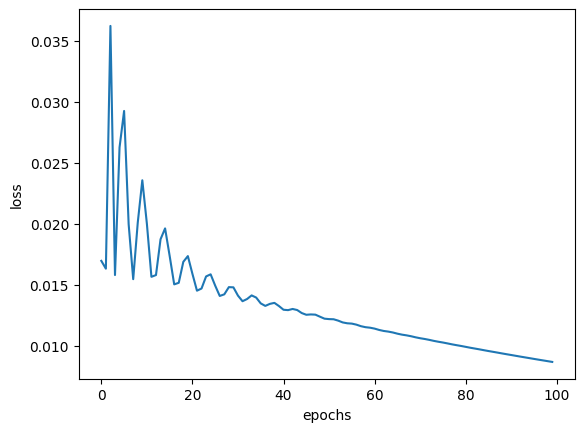

In [17]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')